# Handling External Data

This notebook aims to pre-process any external data sets obtained for this project.

### Environment Setup

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set(style='whitegrid', rc={'axes.grid' : False})

In [3]:
pd.options.display.max_rows = 1000

## GDP

In [60]:
gdp_quart = pd.read_csv('data/external/SQGDP/SQGDP2_IL_2005_2019.csv')
gdp_quart.head(1)

,GeoFIPS,GeoName,Region,TableName,ComponentName,Unit,IndustryId,IndustryClassification,Description,2005:Q1,...,2016:Q4,2017:Q1,2017:Q2,2017:Q3,2017:Q4,2018:Q1,2018:Q2,2018:Q3,2018:Q4,2019:Q1
0,"""17000""",Illinois,3.0,SQGDP2,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,579326.8,...,815582.4,814756.8,820407.7,831712.3,836365.0,848780.7,857915.1,871706.1,879947.3,888232.8


In [61]:
gdp_quart.Description.unique()

array(['All industry total', ' Private industries',
       '   Agriculture, forestry, fishing and hunting',
       '   Mining, quarrying, and oil and gas extraction', '   Utilities',
       '   Construction', '   Manufacturing',
       '     Durable goods manufacturing',
       '     Nondurable goods manufacturing', '   Wholesale trade',
       '   Retail trade', '   Transportation and warehousing',
       '   Information', '   Finance and insurance',
       '   Real estate and rental and leasing',
       '   Professional, scientific, and technical services',
       '   Management of companies and enterprises',
       '   Administrative and support and waste management and remediation services',
       '   Educational services', '   Health care and social assistance',
       '   Arts, entertainment, and recreation',
       '   Accommodation and food services',
       '   Other services (except government and government enterprises)',
       ' Government and government enterprises', nan

In [62]:
gdp_quart.Unit.unique()

array(['Millions of current dollars', nan], dtype=object)

In [63]:
gdp_all_ind_q = gdp_quart[gdp_quart['Description'] == 'All industry total']

In [64]:
gdp_all_ind_q.columns

Index(['GeoFIPS', 'GeoName', 'Region', 'TableName', 'ComponentName', 'Unit',
       'IndustryId', 'IndustryClassification', 'Description', '2005:Q1',
       '2005:Q2', '2005:Q3', '2005:Q4', '2006:Q1', '2006:Q2', '2006:Q3',
       '2006:Q4', '2007:Q1', '2007:Q2', '2007:Q3', '2007:Q4', '2008:Q1',
       '2008:Q2', '2008:Q3', '2008:Q4', '2009:Q1', '2009:Q2', '2009:Q3',
       '2009:Q4', '2010:Q1', '2010:Q2', '2010:Q3', '2010:Q4', '2011:Q1',
       '2011:Q2', '2011:Q3', '2011:Q4', '2012:Q1', '2012:Q2', '2012:Q3',
       '2012:Q4', '2013:Q1', '2013:Q2', '2013:Q3', '2013:Q4', '2014:Q1',
       '2014:Q2', '2014:Q3', '2014:Q4', '2015:Q1', '2015:Q2', '2015:Q3',
       '2015:Q4', '2016:Q1', '2016:Q2', '2016:Q3', '2016:Q4', '2017:Q1',
       '2017:Q2', '2017:Q3', '2017:Q4', '2018:Q1', '2018:Q2', '2018:Q3',
       '2018:Q4', '2019:Q1'],
      dtype='object')

In [65]:
gdp_all_ind_q.drop(columns=['GeoFIPS', 'GeoName', 'Region', 'TableName', 'ComponentName', 'Unit', 'IndustryId', 'IndustryClassification', 'Description'], inplace=True)

/Users/vitorsb/anaconda/envs/ds/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
gdp_all_ind_q = gdp_all_ind_q.T.rename(columns={0: 'GDP'})
gdp_all_ind_q.index = pd.to_datetime(gdp_all_ind_q.index.str.replace(':', '-'))

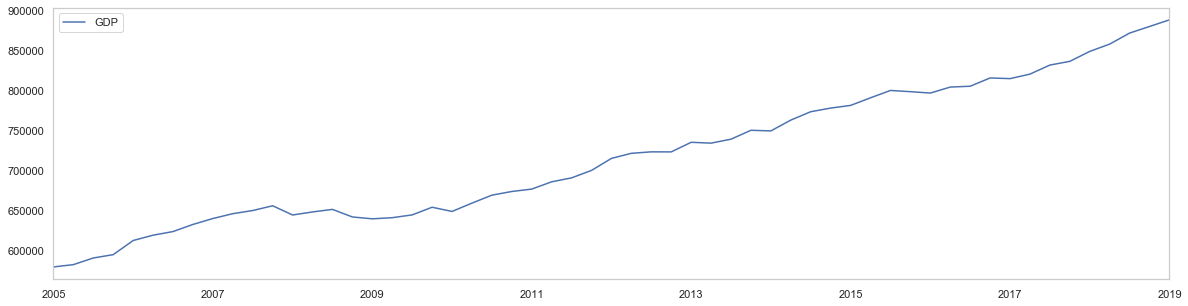

In [70]:
gdp_all_ind_q.plot.line(figsize=(20,5))

In [71]:
gdp_all_ind_q.to_csv('data/external/quarterly_gdp_Illinois.csv')

## Unemployment, Per Capita Income and Poverty Level

### For Communities

#### From 2015

In [86]:
economic_comm_2015 = pd.read_csv('data/external/Public_Health_Statistics-_Selected_public_health_indicators_by_Chicago_community_area.csv')
economic_comm_2015 = economic_comm_2015[['Community Area',
                                         'Community Area Name',
                                         'Below Poverty Level',
                                         'Per Capita Income',
                                         'Unemployment']]
economic_comm_2015.set_index('Community Area', inplace=True)
economic_comm_2015.head()

,Community Area Name,Below Poverty Level,Per Capita Income,Unemployment
Community Area,,,,
1,Rogers Park,22.7,23714,7.5
2,West Ridge,15.1,21375,7.9
3,Uptown,22.7,32355,7.7
4,Lincoln Square,9.5,35503,6.8
5,North Center,7.1,51615,4.5


In [87]:
economic_comm_2015.to_pickle('data/external/Economic_Indicators_2015.pkl')
economic_comm_2015.to_csv('data/external/Economic_Indicators_2015.csv')

#### From 2008–2012

In [108]:
economic_comm_2012 = pd.read_csv('data/external/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')
economic_comm_2012 = economic_comm_2012[['Community Area Number',
                                         'COMMUNITY AREA NAME',
                                         'PERCENT HOUSEHOLDS BELOW POVERTY',
                                         'PER CAPITA INCOME',
                                         'PERCENT AGED 16+ UNEMPLOYED']]
economic_comm_2012.rename(columns = {'Community Area Number': 'Community Area',
                                     'COMMUNITY AREA NAME': 'Community Area Name',
                                     'PERCENT HOUSEHOLDS BELOW POVERTY': 'Below Poverty Level',
                                     'PER CAPITA INCOME': 'Per Capita Income',
                                     'PERCENT AGED 16+ UNEMPLOYED': 'Unemployment'},
                         inplace=True)
economic_comm_2012.set_index('Community Area', inplace=True)
economic_comm_2012.head()

,Community Area Name,Below Poverty Level,Per Capita Income,Unemployment
Community Area,,,,
1.0,Rogers Park,23.6,23939,8.7
2.0,West Ridge,17.2,23040,8.8
3.0,Uptown,24.0,35787,8.9
4.0,Lincoln Square,10.9,37524,8.2
5.0,North Center,7.5,57123,5.2


In [113]:
economic_comm_2012 = economic_comm_2012[economic_comm_2012.index.notna()]
economic_comm_2012.index = economic_comm_2012.index.astype(int)

In [116]:
economic_comm_2012.to_pickle('data/external/Economic_Indicators_2012.pkl')
economic_comm_2012.to_csv('data/external/Economic_Indicators_2012.csv')

### Unemployment Time Series

Unemployment data from 2009 to 2019.

In [120]:
unemp_ts = pd.read_csv('data/external/Unemployment-Chicago Area-Time Series.csv', parse_dates=True, index_col='DATE')
unemp_ts.head()

,CHIC917URN
DATE,
2001-01-01,5.3
2001-02-01,5.3
2001-03-01,5.5
2001-04-01,5.3
2001-05-01,4.9


In [121]:
unemp_ts.rename(columns={'DATE': 'Date', 'CHIC917URN': 'Unemployment'}, inplace=True)

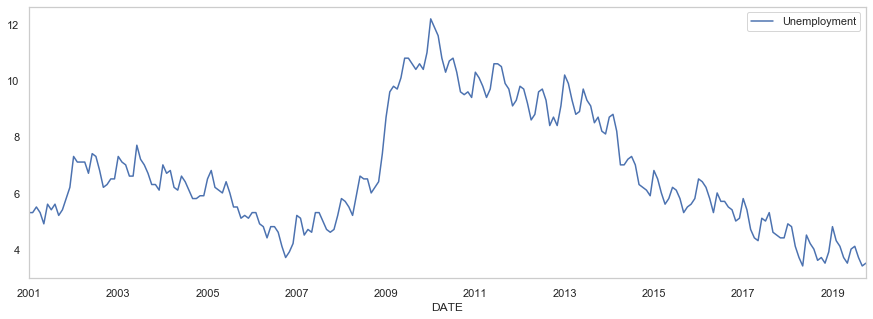

In [122]:
unemp_ts.plot(figsize=(15,5));

In [125]:
unemp_ts.to_pickle('data/external/Unemployment-Chicago Area-Time Series.pkl')

## House Prices

### Convert neighborhoods into community areas

In [367]:
neighbor2comm1 = pd.read_csv('data/external/Neighborhood_to_Community Area.csv')
neighbor2comm1.rename(columns={'Community Area': 'Community Name'}, inplace=True)
neighbor2comm1.head()

,Neighborhood,Community Name
0,Albany Park,Albany Park
1,Altgeld Gardens,Riverdale
2,Andersonville,Edgewater
3,Archer Heights,Archer Heights
4,Armour Square,Armour Square


In [368]:
neighbor2comm2 = pd.read_csv('data/external/Neighborhood_to_Community Area2.csv', sep=';')
neighbor2comm2.head()

,Community Area,Community Name,Neighborhoods
0,1,Rogers Park,East Rogers Park
1,2,West Ridge,"Arcadia Terrace,Peterson Park,West Rogers Park"
2,3,Uptown,"Buena Park,Argyle Street,Margate Park,Sheridan..."
3,4,Lincoln Square,"Ravenswood,Ravenswood Gardens,Rockwell Crossing"
4,5,North Center,"Horner Park,Roscoe Village"


In [369]:
neighbor2comm2 = neighbor2comm2.join(neighbor2comm2.Neighborhoods.str.split(',', expand=True)).drop(columns=['Neighborhoods'])
neighbor2comm2 = neighbor2comm2.melt(id_vars=['Community Area', 'Community Name'], value_vars=range(0,8), value_name='Neighborhood').drop(columns=['variable'])
neighbor2comm2 = neighbor2comm2.dropna()

In [370]:
neighbor2comm2 = neighbor2comm2.drop(columns=['Community Area'])

In [371]:
neighbor2comm = pd.concat([neighbor2comm1, neighbor2comm2], sort=True).sort_values('Neighborhood')

In [372]:
neighbor2comm.head()

,Community Name,Neighborhood
0,Albany Park,Albany Park
1,Riverdale,Altgeld Gardens
53,Riverdale,Altgeld Gardens
2,Edgewater,Andersonville
76,Edgewater,Andersonville


### Cleaning 'The Loop'

The “Loop” community is also written as “The Loop”. Let's make sure we only use on form on the data.

In [373]:
neighbor2comm.loc[neighbor2comm['Community Name'] == 'The Loop', 'Community Name'] = 'Loop'

In [374]:
neighbor2comm.loc[neighbor2comm['Community Name'] == 'The Loop'] # should be empty

,Community Name,Neighborhood


In [375]:
neighbor2comm.drop_duplicates(inplace=True)

### Neighborhoods with multiple communities

Are there **neighborhoods** that map onto two or more **communities**?

In [376]:
neighbor2comm.set_index('Neighborhood').loc[neighbor2comm.groupby('Neighborhood').size() > 1].sort_values(by='Neighborhood')

,Community Name
Neighborhood,
Belmont Central,Belmont Cragin
Belmont Central,Portage Park
Belmont Gardens,Hermosa
Belmont Gardens,Avondale
Belmont Gardens,Logan Square
Bronzeville,Grand Boulevard
Bronzeville,Douglas
Kosciuszko Park,Avondale
Kosciuszko Park,Logan Square


I don't really know the best way to solve this right now.

For the time being, I'll keep it as is, with each Neighborhood weighing the same on each Community.

In [377]:
house_prices = pd.read_csv('data/external/ChicagoHousePrices.csv', sep=';')
house_prices.head()

,Region Name,11 2009,12 2009,01 2010,02 2010,03 2010,04 2010,05 2010,06 2010,07 2010,...,01 2019,02 2019,03 2019,04 2019,05 2019,06 2019,07 2019,08 2019,09 2019,10 2019
0,Near West Side,279300.0,278700.0,278600.0,279700.0,278900.0,275600.0,274200.0,273200.0,270300.0,...,362300,364600,367000,364400,360500,361100,361800,361300,360600,359800
1,Albany Park,218100.0,215300.0,210500.0,209800.0,209600.0,206300.0,203300.0,204000.0,203300.0,...,265500,267500,268100,266700,265100,264400,263600,262700,262200,262400
2,Andersonville,280300.0,281600.0,282800.0,283500.0,283300.0,282400.0,281600.0,279400.0,275500.0,...,320100,319800,320600,321200,322100,323000,323500,322200,321600,322200
3,Arcadia Terrace,264600.0,263800.0,264000.0,265400.0,264700.0,261800.0,258700.0,254800.0,248400.0,...,320100,322700,323200,321200,318800,315200,311400,309100,308300,309100
4,Archer Heights,157600.0,155800.0,154900.0,155300.0,154800.0,153000.0,152100.0,151700.0,150600.0,...,174000,175100,176200,176700,176500,175600,174900,174900,175900,177500


In [378]:
house_prices = house_prices.melt(id_vars='Region Name', var_name='Month', value_name='Price')
house_prices.rename(columns={'Region Name': 'Neighborhood'}, inplace=True)
house_prices['Month'] = house_prices['Month'].map(lambda x: pd.to_datetime(x, format='%m %Y'))

In [379]:
house_prices

,Neighborhood,Month,Price
0,Near West Side,2009-11-01,279300.0
1,Albany Park,2009-11-01,218100.0
2,Andersonville,2009-11-01,280300.0
3,Arcadia Terrace,2009-11-01,264600.0
4,Archer Heights,2009-11-01,157600.0
...,...,...,...
15475,Wildwood,2019-10-01,414200.0
15476,Woodlawn,2019-10-01,161100.0
15477,Wrightwood,2019-10-01,178500.0
15478,Wrightwood Neighbors,2019-10-01,527100.0


In [380]:
def neigh2comm(neighborhood, map_df = neighbor2comm):
    '''Convert neighborhood into its Community Area.
    If there's more than 1 Community Area, return the first value.
    If the Community Area doesn't exist, return None.'''
    comm_names = map_df[map_df.Neighborhood == neighborhood]['Community Name'].values
    if comm_names.size == 0:
        return None
    else:
        return comm_names[0]

In [381]:
house_prices['Community Name'] = house_prices['Neighborhood'].map(neigh2comm)

In [382]:
house_prices.head()

,Neighborhood,Month,Price,Community Name
0,Near West Side,2009-11-01,279300.0,Near West Side
1,Albany Park,2009-11-01,218100.0,Albany Park
2,Andersonville,2009-11-01,280300.0,Edgewater
3,Arcadia Terrace,2009-11-01,264600.0,West Ridge
4,Archer Heights,2009-11-01,157600.0,Archer Heights


Check which neighborhoods didn't map into community names.

In [383]:
# check which neighborhoods didn't map into community names
neighborhoods_without_comms = house_prices[house_prices['Community Name'].isna()]['Neighborhood'].unique()
neighborhoods_without_comms

array(['Clearing', 'East Ukrainian Village', 'Kelvin Park',
       'Lathrop Homes', 'Near North', 'Printers Row',
       'University Village - Little Italy', 'West De Paul'], dtype=object)

In [384]:
for neigh in neighborhoods_without_comms:
    print(neighbor2comm[neighbor2comm['Community Name'].str.contains(neigh)])

   Community Name      Neighborhood
38       Clearing  Chrysler Village
40       Clearing     Clearing East
41       Clearing     Clearing West
Empty DataFrame
Columns: [Community Name, Neighborhood]
Index: []
Empty DataFrame
Columns: [Community Name, Neighborhood]
Index: []
Empty DataFrame
Columns: [Community Name, Neighborhood]
Index: []
      Community Name      Neighborhood
7    Near North Side     Cabrini–Green
74   Near North Side        Gold Coast
161  Near North Side      Goose Island
124  Near North Side  Magnificent Mile
137  Near North Side   Near North Side
157  Near North Side          Old Town
180  Near North Side       River North
469  Near North Side        River West
546  Near North Side     Streeterville
84   Near North Side    The Gold Coast
Empty DataFrame
Columns: [Community Name, Neighborhood]
Index: []
Empty DataFrame
Columns: [Community Name, Neighborhood]
Index: []
Empty DataFrame
Columns: [Community Name, Neighborhood]
Index: []


So it seems that **Clearing** and **Near North Side** are listed as neighborhoods but are actually Community Areas. Also, **Near North** looks like it is the same as **Near North Side**.

Let's add these manually.

In [385]:
comms_as_neighborhoods = ['Clearing', 'Near North Side', 'Near North']
for comm in comms_as_neighborhoods:
    name_to_repl = comm
    if comm == 'Near North':
        name_to_repl = 'Near North Side'
    house_prices.loc[house_prices['Neighborhood'] == comm, 'Community Name'] = name_to_repl

In [386]:
len(house_prices[house_prices['Neighborhood'].isin(comms_as_neighborhoods)])

240

We added back **240** usable rows to our data.

In [387]:
# add back Community Area ID
# house_prices['Community Area']
comm_areas_id = pd.read_csv('data/external/Neighborhood_to_Community Area2.csv',
                            sep=';',
                            usecols=['Community Name', 'Community Area'],
                            index_col='Community Name')

In [388]:
house_prices = house_prices.join(comm_areas_id, on='Community Name')

In [389]:
house_prices.head()

,Neighborhood,Month,Price,Community Name,Community Area
0,Near West Side,2009-11-01,279300.0,Near West Side,28.0
1,Albany Park,2009-11-01,218100.0,Albany Park,14.0
2,Andersonville,2009-11-01,280300.0,Edgewater,77.0
3,Arcadia Terrace,2009-11-01,264600.0,West Ridge,2.0
4,Archer Heights,2009-11-01,157600.0,Archer Heights,57.0


In [390]:
avg_house_prices = house_prices.groupby(['Month', 'Community Name']).mean()
avg_house_prices.rename(columns={'Price': 'Avg Price'}, inplace=True)

In [391]:
avg_house_prices.head()

Avg Price  Community Area
Month      Community Name                           
2009-11-01 Albany Park      286175.0            14.0
           Archer Heights   157600.0            57.0
           Armour Square    217700.0            34.0
           Ashburn          150825.0            70.0
           Austin           169800.0            25.0

In [393]:
avg_house_prices.groupby('Month').size().unique()

array([60])

From the above, we can see we have House Price data for only 60 communities.

In [394]:
avg_house_prices.to_csv('data/external/avg_house_prices_per_community.csv')

## Population of each community area

In [75]:
pop_comm = pd.read_csv('data/external/Population_by_Community_Area.csv', sep=';', index_col='Community Area')
pop_comm.to_pickle('data/external/Population_by_Community_Area.pkl')